# Reed frequency

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

REED_GALLONS_PER_TICK = 0.1
REED_GPM_FILE = f'sample_data/{[file for file in sorted(os.listdir('sample_data')) if 'reed_gpm' in file][-1]}'
REED_TICKLIST_FILE = f'sample_data/{[file for file in sorted(os.listdir('sample_data')) if 'reed_ticklist' in file][-1]}'

In [2]:
def plot_freq(df, given_title):
    fig, ax = plt.subplots(1,1)
    ax2 = ax.twinx()
    ax.plot(df.timestamp, df.frequency)
    ax2.plot(df.timestamp, df.gpm)
    ax.set_xlabel('Time')
    ax.set_ylabel('Frequency [Hz]')
    ax2.set_ylabel('GPM')
    ax.set_title(given_title)
    plt.tight_layout()
    plt.show()

### Ticklists

,timestamp,tick_delta_us,frequency
0,1.729289e+09,101,9.90
1,1.729289e+09,144,6.94
2,1.729289e+09,1075,0.93
3,1.729289e+09,100,10.00
4,1.729289e+09,68,14.71


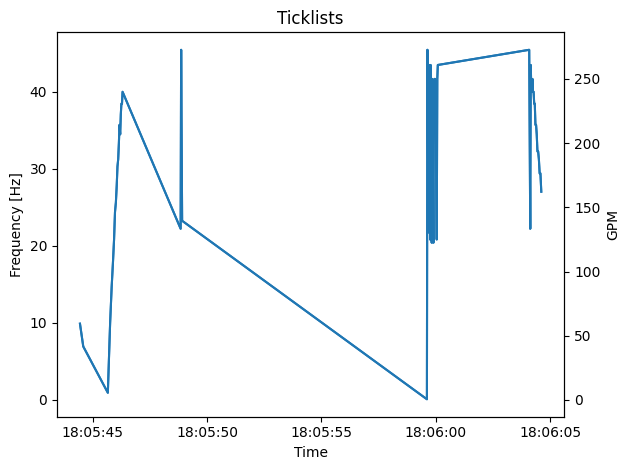

In [3]:
if os.path.exists(REED_TICKLIST_FILE):
    
    df_ticklist = pd.read_csv(REED_TICKLIST_FILE)
    display(df_ticklist.head())
    
    df_ticklist['timestamp'] = pd.to_datetime(list(df_ticklist['timestamp']), unit='s', utc=True).tz_convert('America/New_York')
    df_ticklist['gpm'] = [round(x * REED_GALLONS_PER_TICK * 60, 2) for x in list(df_ticklist['frequency'])] 

    plot_freq(df_ticklist, 'Ticklists')

### GPM reports

,timestamp,gpm
0,1.729289e+09,54.07
1,1.729289e+09,53.87
2,1.729289e+09,53.86
3,1.729289e+09,53.93
4,1.729289e+09,54.06


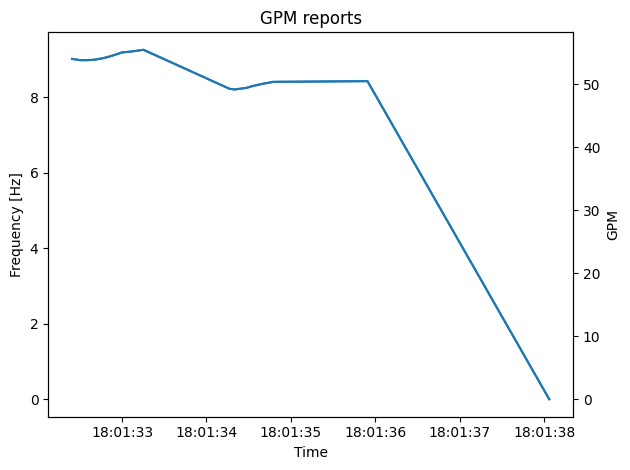

In [4]:
if os.path.exists(REED_GPM_FILE):
    
    df_gpm = pd.read_csv(REED_GPM_FILE)
    display(df_gpm.head())
    
    df_gpm['timestamp'] = pd.to_datetime(list(df_gpm['timestamp']), unit='s', utc=True).tz_convert('America/New_York')
    df_gpm['frequency'] = [x/REED_GALLONS_PER_TICK/60 for x in list(df_gpm['gpm'])]

    plot_freq(df_gpm, 'GPM reports')